<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 400>
<h1 align=center><font size = 5>Hacktiv8 PTP Introduction to Data Science Projects 3 // Statistical Treatment for Datasets</font></h1>

## Bank Marketing Dataset

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

Attribute Information:

Input variables:

**Bank client data:** 
* age (numeric)
* job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','selfemployed','services','student','technician','unemployed','unknown')
* marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')  
* default: has credit in default? (categorical: 'no','yes','unknown')
* housing: has housing loan? (categorical: 'no','yes','unknown')
* loan: has personal loan? (categorical: 'no','yes','unknown')

**Related with the last contact of the current campaign:** 
* contact: contact communication type (categorical: 'cellular','telephone')
* month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* duration: last contact duration, in seconds (numeric). 

Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**Other atributes:** 
* campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* previous: number of contacts performed before this campaign and for this client (numeric)
* poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

**social and economic context attributes:** 
* emp.var.rate: employment variation rate - quarterly indicator (numeric)
* cons.price.idx: consumer price index - monthly indicator (numeric)
* cons.conf.idx: consumer confidence index - monthly indicator (numeric)
* euribor3m: euribor 3 month rate - daily indicator (numeric)
* nr.employed: number of employees - quarterly indicator (numeric)

**Output variable (desired target):** 
* y - has the client subscribed a term deposit? (binary: 'yes','no')



## Data Preparation

In [1]:
# Load the library you need.
from time import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pydotplus
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

plt.style.use("ggplot")

In [2]:
# Load your dataset here
df = pd.read_csv('dataset/bank-additional-full.csv',sep=";")
print ('Data read into a pandas dataframe!')


Data read into a pandas dataframe!


Let's view the top 5 rows of the dataset using the `head()` function.

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


We can also veiw the bottom 5 rows of the dataset using the `tail()` function.

In [4]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


To view the dimensions of the dataframe, we use the `.shape` parameter. 

In [5]:
df.shape
print(f"Data Row, Data Column : ", df.shape)

Data Row, Data Column :  (41188, 21)


To check the column's dtype and whether each columns has null or not, we use the `.info` parameter. 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Since all the paramater already had the fit or proper data type and had no missing value, now let's see the columns with no potential become the model atributes. *Contact, month, day_of_week, and duration* should be discarded as model input to have a realistic predictive model. 


In [7]:
df=df.drop(columns=['day_of_week', 'month', 'contact','duration','poutcome'])
df

,age,job,marital,education,default,housing,loan,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,yes


Before training the model, let's replace all the categorical parameter(columns) except the target with numerical initial.

In [8]:
df_clean =df
df_clean["job_num"] = df_clean["job"].replace({"admin.": 0, "blue-collar": 1, "technician": 2, "services": 3, "management": 4, "retired": 5, "entrepreneur": 6, "self-employed": 7, "housemaid": 8, "unemployed": 9, "student": 10, "unknown": 99})
df_clean["mar_num"] = df_clean["marital"].replace({"married": 0, "single": 1, "divorced": 2, "unknown": 99})
df_clean["edu_num"] = df_clean["education"].replace({"university.degree": 0, "high.school": 1, "basic.9y": 2, "professional.course": 3, "basic.4y": 4, "basic.6y": 5, "illiterate": 6, "unknown": 99})
df_clean["def_num"] = df_clean["default"].replace({"no": 0, "yes": 1, "unknown": 99})
df_clean["housing_num"] = df_clean["housing"].replace({"no": 0, "yes": 1, "unknown": 99})
df_clean["loan_num"] = df_clean["loan"].replace({"no": 0, "yes": 1, "unknown": 99})

In [9]:
df_clean = df_clean.drop(["job", "marital", "education", "default", "housing", "loan"], axis=1)
df_clean

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_num,mar_num,edu_num,def_num,housing_num,loan_num
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,8,0,4,0,0,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,3,0,1,99,0,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,3,0,1,0,1,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0,0,5,0,0,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,3,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,yes,5,0,3,0,1,0
41184,46,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,no,1,0,3,0,0,0
41185,56,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,no,5,0,0,0,1,0
41186,44,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,yes,2,0,3,0,0,0


Since the data already finished to set and now let's jump into model training with some method applied. 

# 02 Model Training

In [10]:
#1. Prepare data features (X) and the target (y)
X = df_clean.drop(["y"], axis=1)
y = df_clean["y"]

#2. We gonna use some machine learning method, then we set the function to run it
def train_model(X, y, model, test_size=.3):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=109
    )
    print(f"Training with {X_train.shape[0]} data.. Validating with {X_test.shape[0]}..")
    
    print("Standardizing data..")
    scaler = StandardScaler()
    scaled_X_train = scaler.fit_transform(X_train)
    scaled_X_test = scaler.transform(X_test)
    
    start = time()
    model.fit(scaled_X_train, y_train)
    end = time()
    print(f"Done training {model.__class__.__name__} in {end-start:.3f}s")
    
    train_prediction = model.predict(scaled_X_train)
    test_prediction = model.predict(scaled_X_test)

    print("Training performance:")
    print(classification_report(y_train, train_prediction))

    print("Testing performance:")
    print(classification_report(y_test, test_prediction))
    
    print("Testing Data Confusion Matrix Visualitation")
    plot_confusion_matrix(model, X_test, y_test)

## <font color="darkblue">2a. Logistic Regression

Training with 28831 data.. Validating with 12357..
Standardizing data..
Done training LogisticRegression in 0.200s
Training performance:
              precision    recall  f1-score   support

          no       0.91      0.99      0.95     25557
         yes       0.71      0.19      0.30      3274

    accuracy                           0.90     28831
   macro avg       0.81      0.59      0.62     28831
weighted avg       0.88      0.90      0.87     28831

Testing performance:
              precision    recall  f1-score   support

          no       0.91      0.99      0.95     10991
         yes       0.69      0.18      0.28      1366

    accuracy                           0.90     12357
   macro avg       0.80      0.58      0.61     12357
weighted avg       0.88      0.90      0.87     12357

Testing Data Confusion Matrix Visualitation


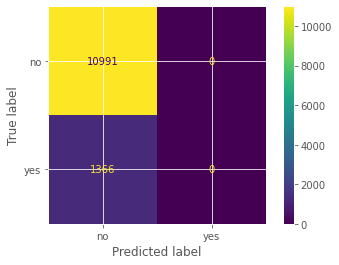

In [11]:
train_model(X,y,LogisticRegression())

## <font color="darkblue">2b. Random Forest

Training with 28831 data.. Validating with 12357..
Standardizing data..
Done training RandomForestClassifier in 1.931s
Training performance:
              precision    recall  f1-score   support

          no       0.99      1.00      1.00     25557
         yes       0.99      0.96      0.97      3274

    accuracy                           0.99     28831
   macro avg       0.99      0.98      0.99     28831
weighted avg       0.99      0.99      0.99     28831

Testing performance:
              precision    recall  f1-score   support

          no       0.91      0.97      0.94     10991
         yes       0.51      0.27      0.35      1366

    accuracy                           0.89     12357
   macro avg       0.71      0.62      0.65     12357
weighted avg       0.87      0.89      0.88     12357

Testing Data Confusion Matrix Visualitation


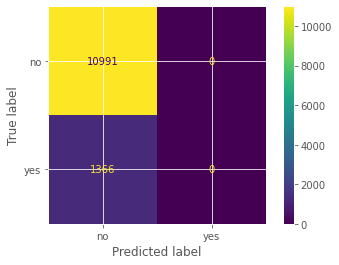

In [12]:
train_model(X,y,RandomForestClassifier())


## <font color="darkblue">2c. Naive Bayes

Training with 28831 data.. Validating with 12357..
Standardizing data..
Done training GaussianNB in 0.041s
Training performance:
              precision    recall  f1-score   support

          no       0.93      0.88      0.91     25557
         yes       0.35      0.51      0.41      3274

    accuracy                           0.84     28831
   macro avg       0.64      0.69      0.66     28831
weighted avg       0.87      0.84      0.85     28831

Testing performance:
              precision    recall  f1-score   support

          no       0.93      0.87      0.90     10991
         yes       0.33      0.51      0.40      1366

    accuracy                           0.83     12357
   macro avg       0.63      0.69      0.65     12357
weighted avg       0.87      0.83      0.85     12357

Testing Data Confusion Matrix Visualitation


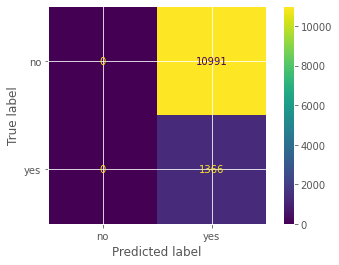

In [13]:
train_model(X,y,GaussianNB())

## <font color="darkblue">2d. Support Vector Machines

Training with 28831 data.. Validating with 12357..
Standardizing data..
Done training SVC in 170.490s
Training performance:
              precision    recall  f1-score   support

          no       0.91      0.98      0.94     25557
         yes       0.64      0.21      0.32      3274

    accuracy                           0.90     28831
   macro avg       0.77      0.60      0.63     28831
weighted avg       0.88      0.90      0.87     28831

Testing performance:
              precision    recall  f1-score   support

          no       0.91      0.99      0.95     10991
         yes       0.63      0.20      0.30      1366

    accuracy                           0.90     12357
   macro avg       0.77      0.59      0.62     12357
weighted avg       0.88      0.90      0.87     12357

Testing Data Confusion Matrix Visualitation


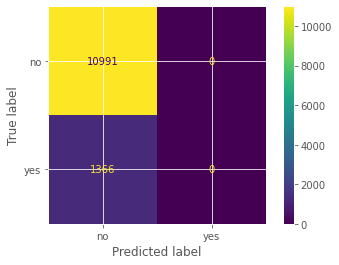

In [14]:
train_model(X,y,SVC(kernel="linear"))

## <font color="darkblue">2e. Decision Tree

Training with 28831 data.. Validating with 12357..
Standardizing data..
Done training DecisionTreeClassifier in 0.133s
Training performance:
              precision    recall  f1-score   support

          no       0.99      1.00      1.00     25557
         yes       1.00      0.95      0.97      3274

    accuracy                           0.99     28831
   macro avg       1.00      0.97      0.99     28831
weighted avg       0.99      0.99      0.99     28831

Testing performance:
              precision    recall  f1-score   support

          no       0.92      0.90      0.91     10991
         yes       0.30      0.33      0.31      1366

    accuracy                           0.84     12357
   macro avg       0.61      0.62      0.61     12357
weighted avg       0.85      0.84      0.84     12357

Testing Data Confusion Matrix Visualitation


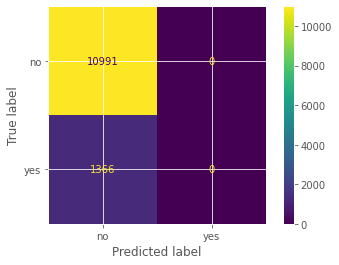

In [15]:
#2. let's set max depth = 5 so that the iteration not so long
train_model(X,y,DecisionTreeClassifier(criterion="entropy"))

## <font color="darkblue">2f. K-Nearest Neighbors



In [16]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=109
)

In [17]:
#1. Let's find out the optimal value for k
error = []

for k in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    prediction = knn.predict(X_test)
    error.append(np.mean(prediction != y_test))

print(error)

[0.1497127134417739, 0.11248684955895444, 0.11661406490248442, 0.10844056000647406, 0.11022092740956543, 0.1065792668123331, 0.10738852472282917, 0.10471797361819211, 0.10520352836448976, 0.10390871570769604, 0.10585093469288662, 0.10398964149874565, 0.10536537994658898, 0.10374686412559683, 0.10398964149874565, 0.10269482884195193, 0.10318038358824957, 0.10229019988670389, 0.10342316096139839, 0.101238164603059, 0.10212834830460468, 0.10083353564781096, 0.10156186776725742, 0.10107631302095978, 0.10115723881200939, 0.10083353564781096, 0.10180464514040624, 0.10083353564781096, 0.10229019988670389, 0.10059075827466213, 0.10148094197620781, 0.10059075827466213, 0.10156186776725742, 0.1002670551104637, 0.10059075827466213, 0.10002427773731488, 0.10075260985676135, 0.09986242615521566, 0.10059075827466213]


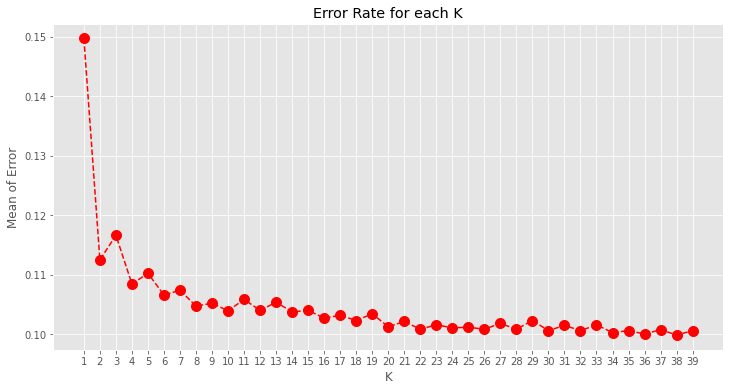

In [18]:
#2 Now plot the error value for each K
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color="r", linestyle="dashed", marker="o", markersize=10)
plt.title("Error Rate for each K")
plt.xlabel("K")
plt.xticks(range(1, 40))
plt.ylabel("Mean of Error")
plt.show()

Training with 28831 data.. Validating with 12357..
Standardizing data..
Done training KNeighborsClassifier in 0.437s
Training performance:
              precision    recall  f1-score   support

          no       0.91      0.98      0.95     25557
         yes       0.68      0.25      0.36      3274

    accuracy                           0.90     28831
   macro avg       0.79      0.62      0.65     28831
weighted avg       0.88      0.90      0.88     28831

Testing performance:
              precision    recall  f1-score   support

          no       0.91      0.98      0.95     10991
         yes       0.64      0.22      0.33      1366

    accuracy                           0.90     12357
   macro avg       0.77      0.60      0.64     12357
weighted avg       0.88      0.90      0.88     12357

Testing Data Confusion Matrix Visualitation


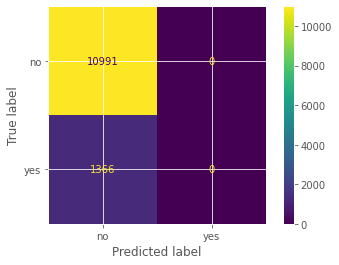

In [19]:
#3. Since the lowest error on K=39, then we'll set the n_neighbors =39
train_model(X,y,KNeighborsClassifier(n_neighbors=39))

# 03 Comparing All Algorithms

=== Using LogisticRegression ===
Training with 20181 data.. Validating with 8650..
Standardizing data..
Done training LogisticRegression in 0.137s
Training performance:
              precision    recall  f1-score   support

          no       0.90      0.99      0.95     17905
         yes       0.70      0.18      0.29      2276

    accuracy                           0.90     20181
   macro avg       0.80      0.59      0.62     20181
weighted avg       0.88      0.90      0.87     20181

Testing performance:
              precision    recall  f1-score   support

          no       0.90      0.99      0.95      7652
         yes       0.75      0.20      0.32       998

    accuracy                           0.90      8650
   macro avg       0.83      0.60      0.63      8650
weighted avg       0.89      0.90      0.87      8650

Testing Data Confusion Matrix Visualitation
=== Using DecisionTreeClassifier ===
Training with 20181 data.. Validating with 8650..
Standardizing data..
Done

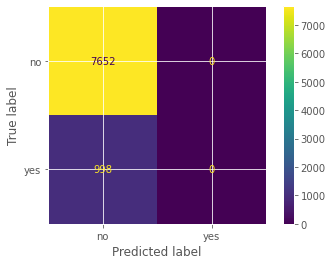

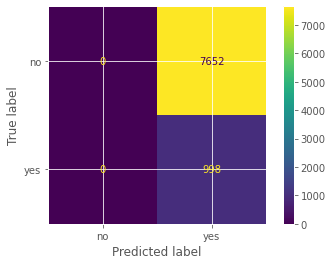

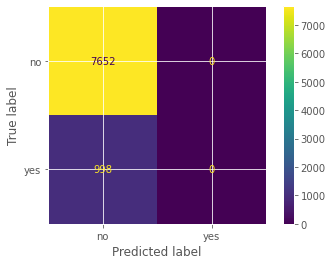

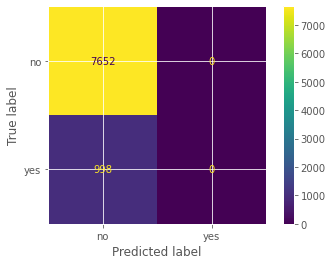

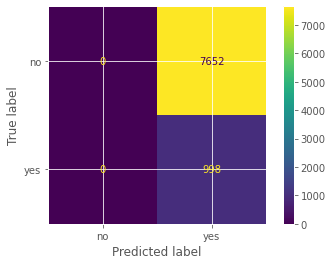

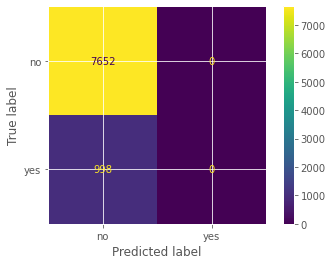

In [20]:
models = [
    LogisticRegression(),
    DecisionTreeClassifier(criterion="entropy"),
    RandomForestClassifier(),
    SVC(kernel="linear"),
    GaussianNB(),
    KNeighborsClassifier(n_neighbors=39)
]

for model in models:
    print(f"=== Using {model.__class__.__name__} ===")
    train_model(X_train, y_train, model)

**Insight** :
As we can see above the best model is the one that developed with Logistic Regression, due to the stable model accuracy between data train and data testing based on f1-score criteria.

Now, let's see the importance of each features based on Random Forest Model!

Training with 28831 data.. Validating with 12357..
Standardizing data..
Done training RandomForestClassifier in 2.017s
Training performance:
              precision    recall  f1-score   support

          no       0.99      1.00      1.00     25557
         yes       0.99      0.96      0.97      3274

    accuracy                           0.99     28831
   macro avg       0.99      0.98      0.99     28831
weighted avg       0.99      0.99      0.99     28831

Testing performance:
              precision    recall  f1-score   support

          no       0.92      0.97      0.94     10991
         yes       0.52      0.28      0.37      1366

    accuracy                           0.89     12357
   macro avg       0.72      0.62      0.65     12357
weighted avg       0.87      0.89      0.88     12357

Testing Data Confusion Matrix Visualitation


age               0.206234
euribor3m         0.195045
job_num           0.091719
campaign          0.087642
edu_num           0.076491
nr.employed       0.056643
pdays             0.053727
mar_num           0.040326
housing_num       0.038282
cons.conf.idx     0.036258
cons.price.idx    0.027201
previous          0.026869
loan_num          0.026241
emp.var.rate      0.024653
def_num           0.012669
dtype: float64

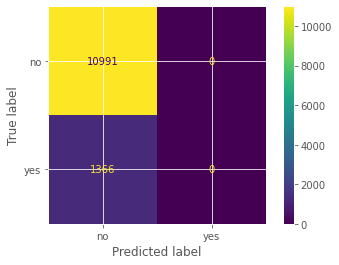

In [21]:
model = RandomForestClassifier()
train_model(X, y, model)

Feature_importance = pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)
Feature_importance

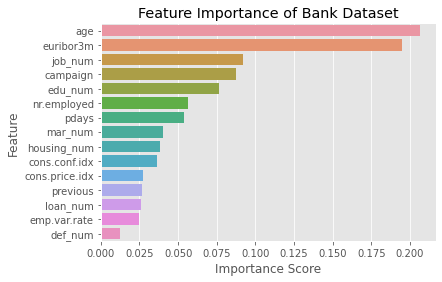

In [22]:
# Plot the feature importance
sns.barplot(x=Feature_importance, y=Feature_importance.index)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance of Bank Dataset")
plt.show()

Based on Random Forest method, the highest feature importance is age with score 20% and the lowest ist default feature with score below 2%. 